# **Credit Card Fraud Detection**

**Introduction**

In this kernel, I will use various predictive models to see how accurate they are in predicting whether a transcation is genuine or fraud.

The data is highly unbalanced so I will have to find the right algorithm. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, balanced_accuracy_score, jaccard_score

In [3]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Exploratory data analysis**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*There are only numerical variables.*

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 *There are no null values.*

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
import seaborn as sns

Text(0.5, 0, 'Transactions type')

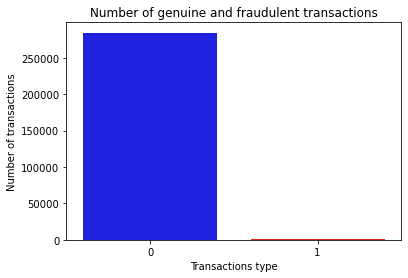

In [8]:
sns.countplot(data.Class, palette=['blue', 'red'] )
plt.title('Number of genuine and fraudulent transactions')
plt.ylabel('Number of transactions')
plt.xlabel('Transactions type')

In [9]:
print('Genuine transactions: ',round(data.Class.value_counts()[0]/len(data.Class)*100,2), '%')
print('Frauds: ',round(data.Class.value_counts()[1]/len(data.Class)*100,2), '%')

Genuine transactions:  99.83 %
Frauds:  0.17 %


*There is only a very small number of fraudulent transactions compared to the number of genuine transactions. Class variable is highly unbalanced this is why I need to create subsamples equaly balanced.*

Text(0.5, 1.0, 'Time Variable Boxplot')

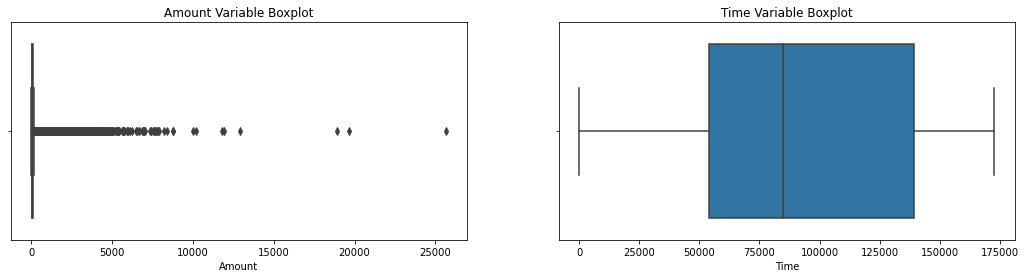

In [10]:
fig, ax = plt.subplots( 1, 2, figsize = (18, 4))
sns.boxplot(data.Amount, ax=ax[0])
ax[0].set_title('Amount Variable Boxplot')
sns.boxplot(data.Time, ax=ax[1])
ax[1].set_title('Time Variable Boxplot')

*The Amount variable has a lot of outliers.*

Text(0.5, 1.0, 'Time Variable Boxplot')

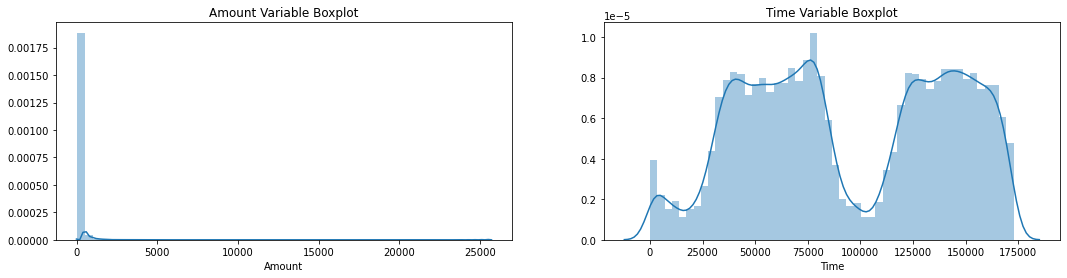

In [11]:
fig, ax = plt.subplots( 1, 2, figsize = (18, 4))
sns.distplot(data.Amount, ax=ax[0])
ax[0].set_title('Amount Variable Boxplot')
sns.distplot(data.Time, ax=ax[1])
ax[1].set_title('Time Variable Boxplot')

The distribution of Amount is strongly positive skewed.

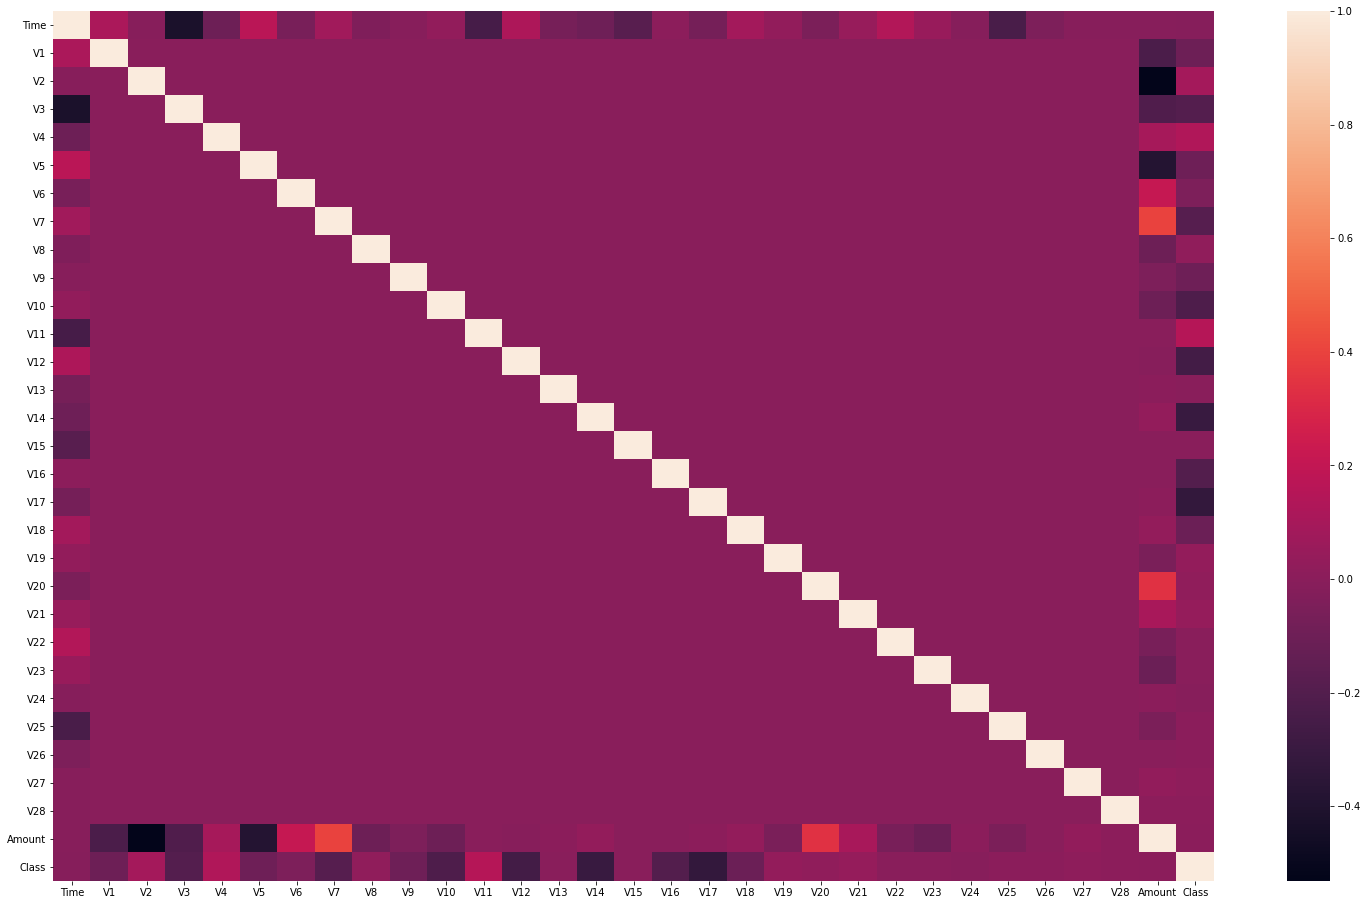

In [12]:
corr = data.corr()
ax = plt.figure(figsize=(26, 16))
ax = sns.heatmap(corr)

*It's a strong negative correlation between Class and V10, V12, V14, V16, V17.
There's a slight positive correlation between Class and V2, V4 and V11.*

**Features processing**

All the variables, except Amount and Time are obtained using PCA. Amount and Time need to be scales. I will use Robust Scale because is not sensible to outliers.

In [13]:
robust_scaler = RobustScaler()
Amount_scaled = robust_scaler.fit_transform(data.Amount.values.reshape(-1, 1))

In [14]:
var_scaled = robust_scaler.fit_transform(data[['Amount', 'Time']])

In [15]:
var_scaled

array([[ 1.78327395, -0.99498349],
       [-0.26982463, -0.99498349],
       [ 4.98372109, -0.99497175],
       ...,
       [ 0.64109551,  1.03497457],
       [-0.16767973,  1.03497457],
       [ 2.72479564,  1.03502156]])

In [16]:
data_scaled = data.copy()
data_scaled.Amount = var_scaled[ : , 0]
data_scaled.Time = var_scaled[ : , 1]
data_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


# Method no.1 : Using Extra Trees Classifiers

**Determine feature importance using Extra Trees Classifiers**

In [17]:
X = data.drop( labels = 'Class', axis = 1)

In [18]:
y = data['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.0152116  0.01355399 0.01494674 0.033483   0.03467349 0.01472592
 0.01407095 0.02156518 0.01404098 0.03805727 0.06154709 0.07806324
 0.09327364 0.01236245 0.14058285 0.01220447 0.06953909 0.14009837
 0.03698618 0.01640962 0.01356325 0.01662799 0.01269063 0.00913065
 0.01233231 0.01044362 0.01390605 0.01273689 0.01132472 0.01184778]


In [22]:
feature_importances = pd.Series(model.feature_importances_)
feature_importances.sort_values( ascending= False)

14    0.140583
17    0.140098
12    0.093274
11    0.078063
16    0.069539
10    0.061547
9     0.038057
18    0.036986
4     0.034673
3     0.033483
7     0.021565
21    0.016628
19    0.016410
0     0.015212
2     0.014947
5     0.014726
6     0.014071
8     0.014041
26    0.013906
20    0.013563
1     0.013554
27    0.012737
22    0.012691
13    0.012362
24    0.012332
15    0.012204
29    0.011848
28    0.011325
25    0.010444
23    0.009131
dtype: float64

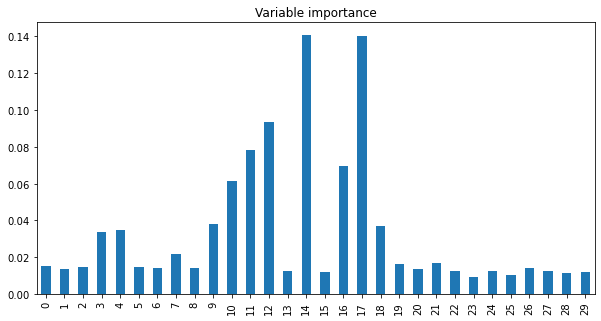

In [23]:
ax = plt.figure( figsize = (10, 5))
ax = feature_importances.plot.bar(title = 'Variable importance')
ax

In [24]:
feature_selection = data.iloc[ : , [17, 14, 12, 11, 10, 16, 18]]
feature_selection.loc[ : , 'Class']  = data.Class

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [25]:
X = feature_selection.drop( labels=['Class'], axis = 1)

In [26]:
y = feature_selection['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

**Random Forest Classifier**

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predicted_model1 = model.predict(X_test)

**Logistic Regression**

In [29]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_predicted_model2 = model2.predict(X_test)

**AdaBoostClassifier**

In [30]:
model3 = AdaBoostClassifier( n_estimators=100, random_state=2020, algorithm='SAMME.R',
                         learning_rate=0.8 )
model3.fit(X_train, y_train)
y_predicted_model3 = model3.predict(X_test)

In [31]:
scores = pd.DataFrame()

In [32]:
metrics = ['f1_score','jaccard_score', 'roc_auc_score']

In [33]:
predictions = {
    'Random Forest': y_predicted_model1,
    'Logistic Regression': y_predicted_model2,
    'Ada Boost Classifier': y_predicted_model3
}

In [34]:
for key, item in predictions.items():
    for metric in metrics:
        scores.loc[key, metric] = getattr(sys.modules[__name__], metric)(y_test, item)
        
scores

,f1_score,jaccard_score,roc_auc_score
Random Forest,0.873016,0.774648,0.904377
Logistic Regression,0.704348,0.543624,0.797718
Ada Boost Classifier,0.811245,0.682432,0.871253


Accuracy score or balanced accuracy score is not a good metric of model accuracy when working with highly unbalanced data.
The best metric in this case is F1 score.
The best score is obtained using Random Forest Algorithm.